# Ad Campaign Data analysis and Optimization


Problem statement_
> 
> 1. How to optimize the social ad campaigns for the highest conversion rate possible? (Attain best Reach to Conversion ratios/Click to Conversion ratios)
> 
> 2. Finding the perfect target demographics with the appropriate click through rates
> 
> 3. Understanding the ideal turnaround/decision making time per age group to convert and re-target future social campaigns
> 
> 4. Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.
> 
>     •    Do data cleaning and data preparing activities, if required.
>     •    Run descriptive analytics on the prepared data and draw tables, charts and graphs.
>     •    Interpret the charts and graphs and list out the insights.
>     •    You can use any one (1) tool to run descriptive analytics.
>     •    Excel or R or Python or Matlab or Tableau or SPSS or any other tool at your disposal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('KAG_conversion_data.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


# Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
df.shape

(1143, 11)

In [53]:
print('Total no. of XYZ campaign: ',len(df['xyz_campaign_id'].unique()),'which are -',df['xyz_campaign_id'].unique())

Total no. of XYZ campaign:  3 which are - [ 916  936 1178]


In [6]:
print('All age groups: ',df['age'].unique())

All age groups:  ['30-34' '35-39' '40-44' '45-49']


In [7]:
print("The number of 0-values in Clicks (given that Conversion are non-zero):", len(df[(df["Clicks"] == 0) & (df["Total_Conversion"] != 0)]))

The number of 0-values in Clicks (given that Conversion are non-zero): 204


we notice that some of entries are errorneous, containing 0 values in Clicks, while the other columns such as Total_Conversion whave non-zero values. This is illogical because an ad cannot still gain postive conversions (customers) while no one clicks on it.
To solve this problem we perform imputation for the invalid enteries in Clicks. we used the K-Nearest Neighbors (KNN) algorithm from sklearn. The algorithm will attempt to predict the true value of an entry in reference to the mean of its neighbors, which partially negates the probability of generating biased values.

In [8]:
from sklearn.impute import KNNImputer
df["Clicks"].replace(0, np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=["gender", "age"])))

df["Clicks"] = df_imputed[5]

In [69]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CR', 'CTR', 'CPC'],
      dtype='object')

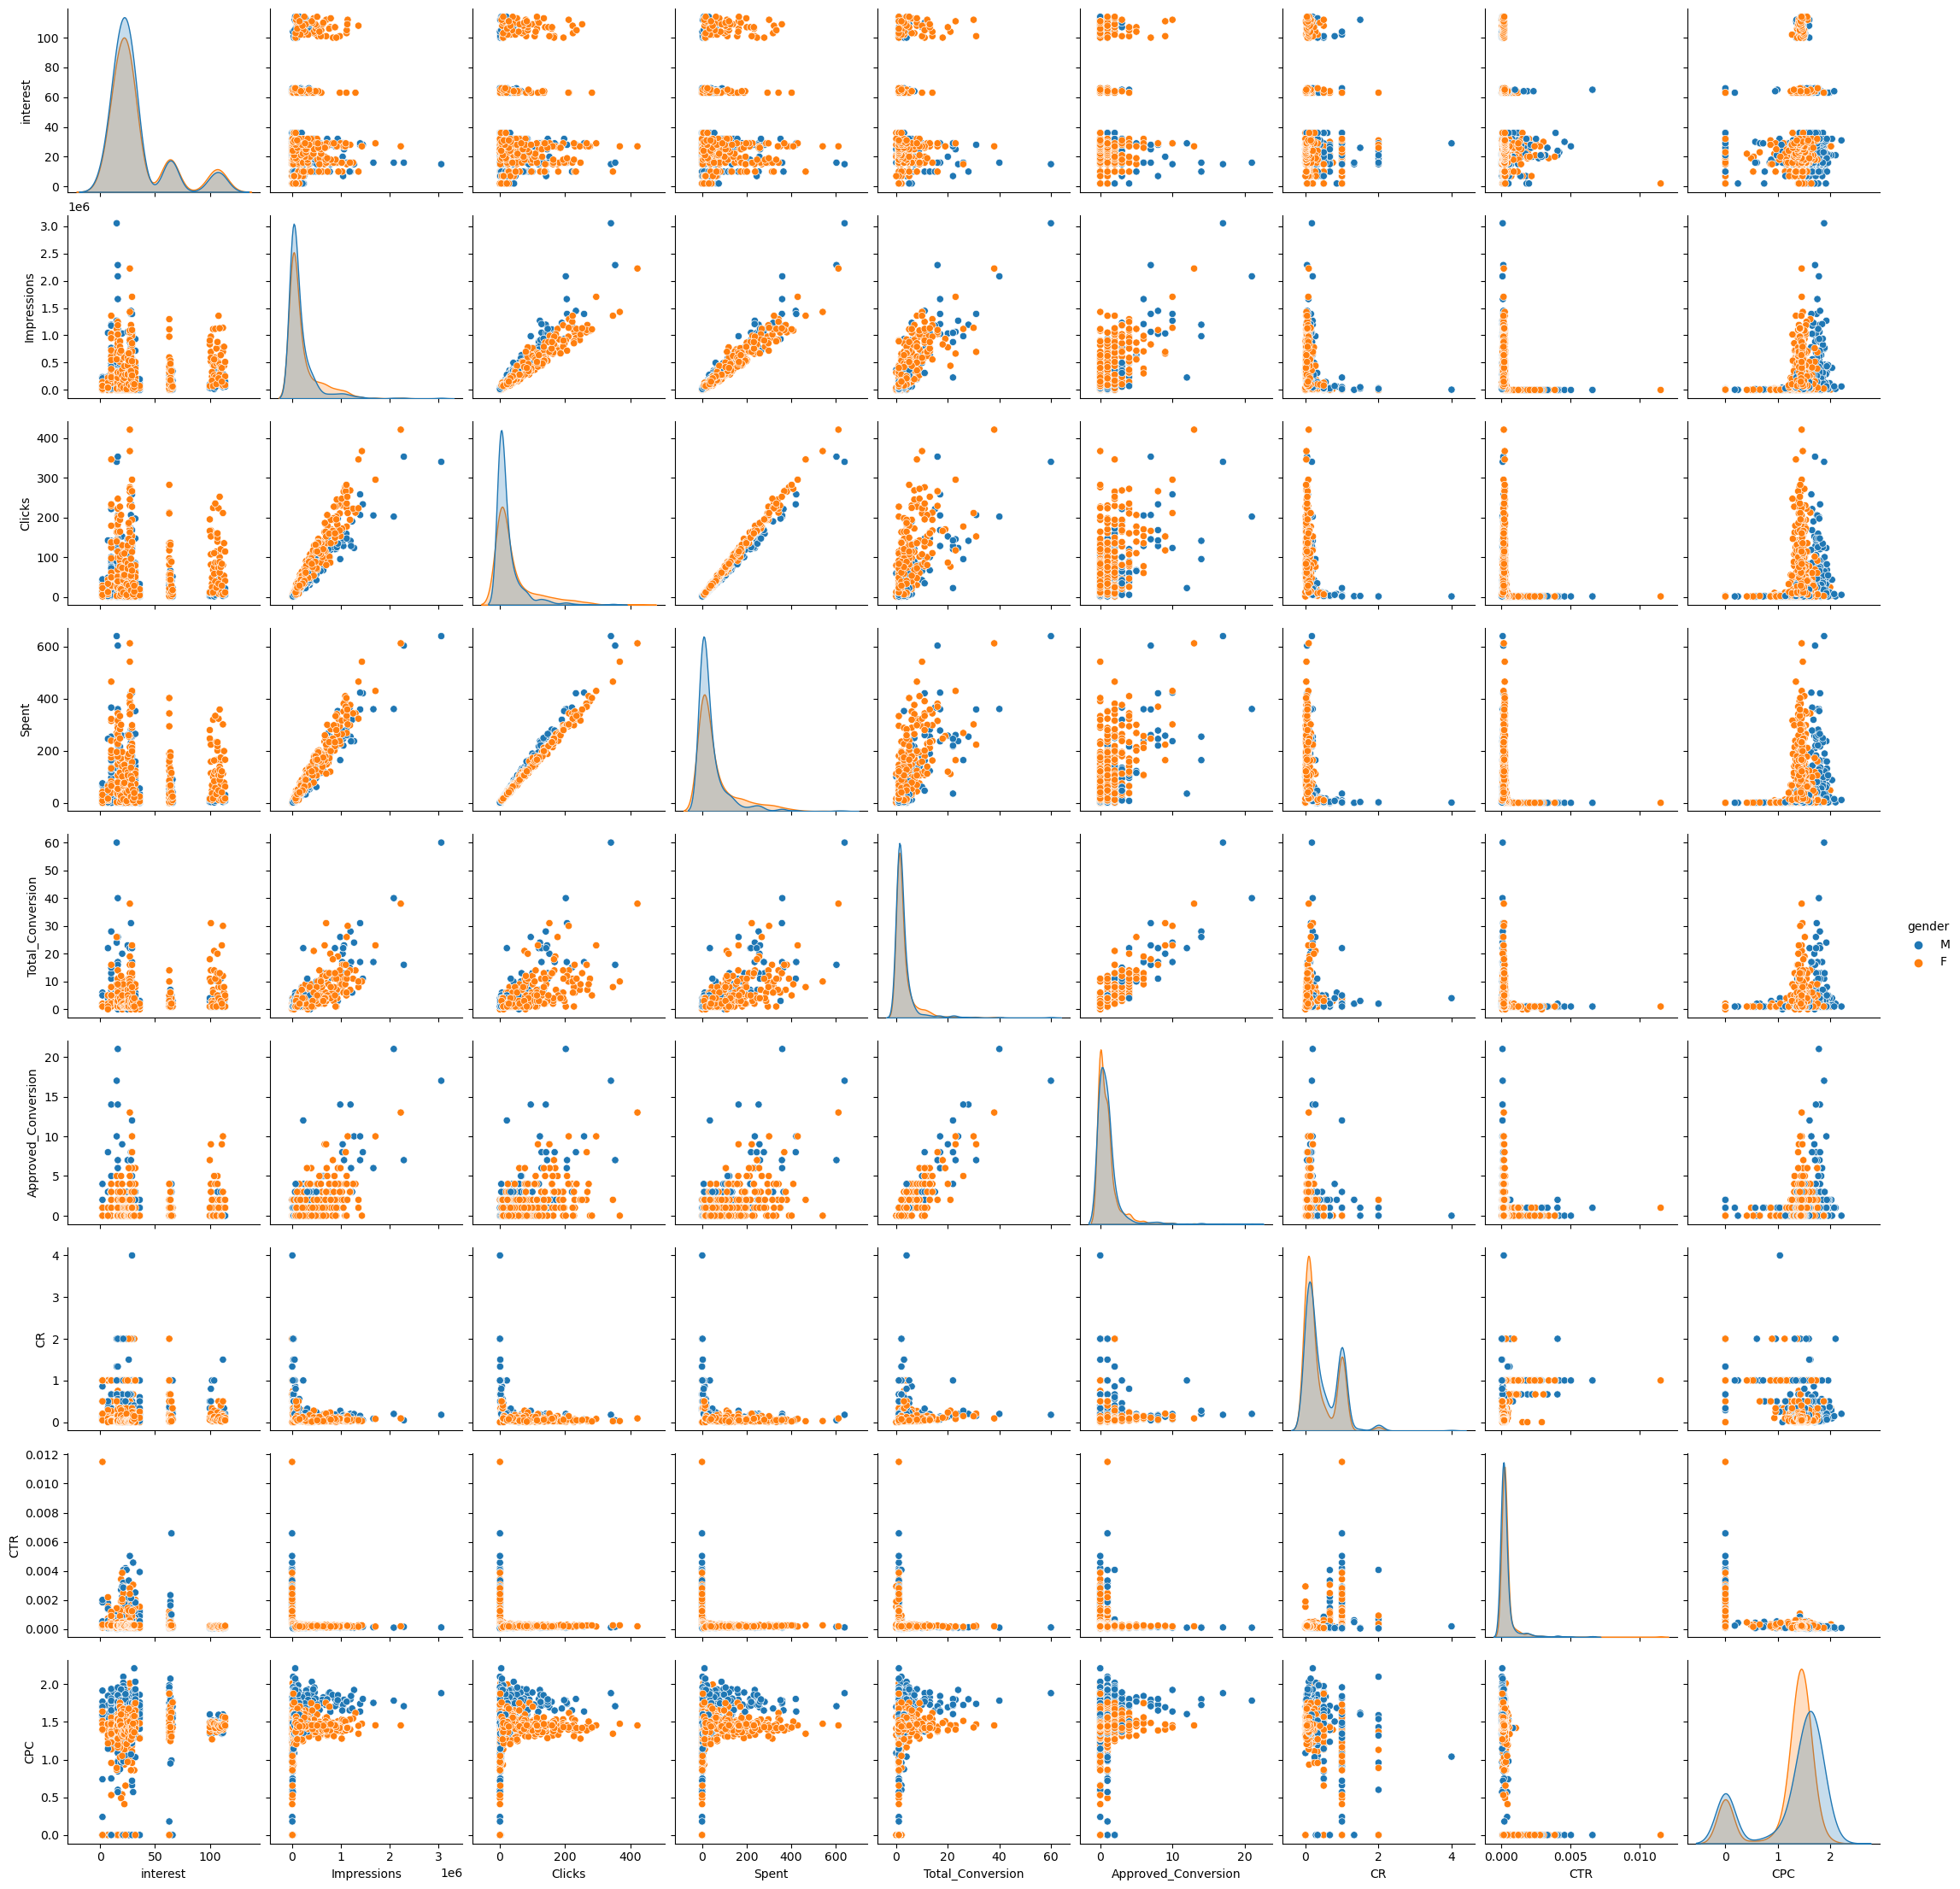

In [73]:
df1= df[[ 'age','interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CR', 'CTR', 'CPC','gender']]
sns.pairplot(df1, hue = 'gender')

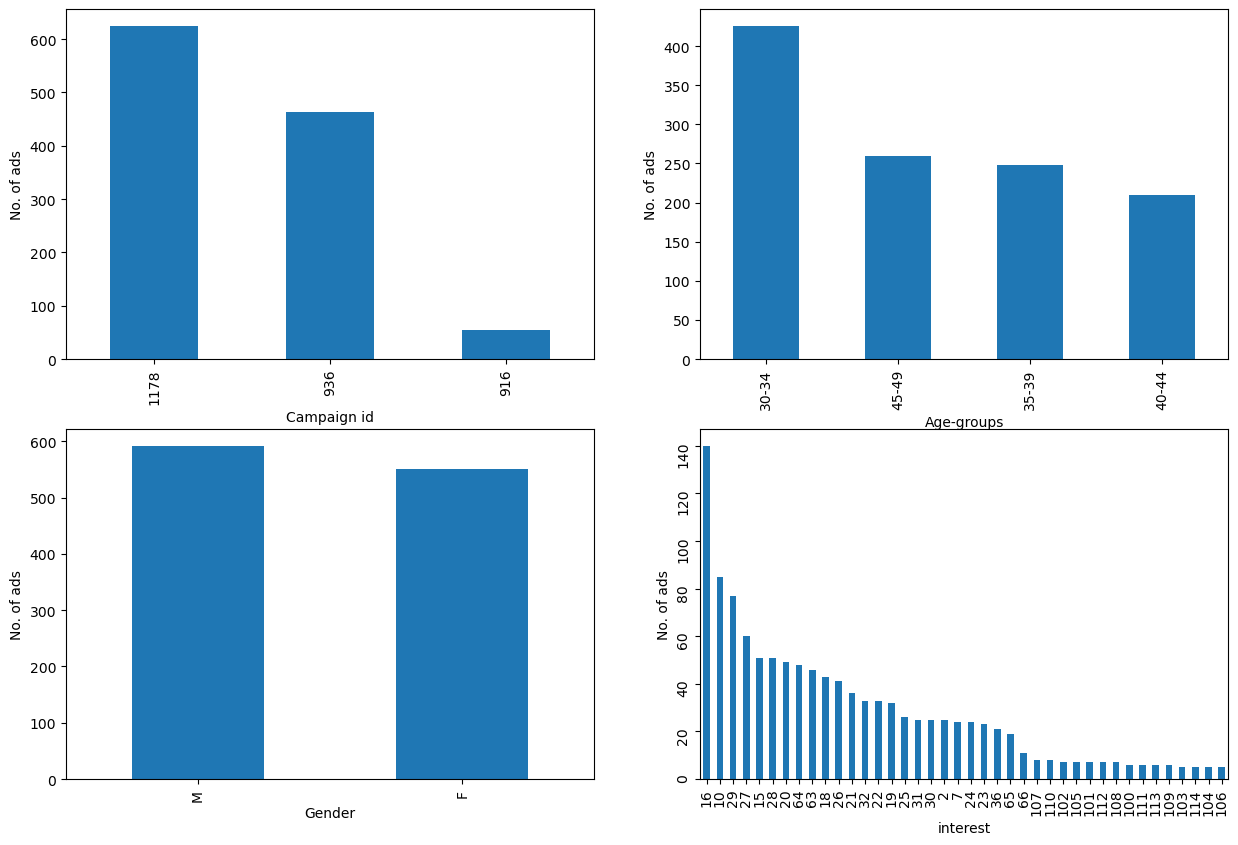

In [9]:

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,10))
df["xyz_campaign_id"].value_counts().plot(kind="bar", ax=ax1)
ax1.set_xlabel('Campaign id')
ax1.set_ylabel('No. of ads')

df["age"].value_counts().plot(kind="bar", ax=ax2)
ax2.set_xlabel('Age-groups')
ax2.set_ylabel('No. of ads')

df["gender"].value_counts().plot(kind="bar", ax=ax3)
ax3.set_xlabel('Gender')
ax3.set_ylabel('No. of ads')

df["interest"].value_counts().plot(kind="bar", ax=ax4)
ax4.set_xlabel('interest')
ax4.set_ylabel('No. of ads')
ax4.tick_params(labelrotation=90)

From the Graphs, we can make some quick observations:

1) The campaign id 1178 and 936 are relatively more focused on by the company than 916. This is given by the number of times the ad campaigns appear, where 1178 and 936 shows up more than 400 times, while it is less than 100 times for 916.

2) The most focused age group is 30-34, where the number of audience in that age group is roughly 1.5 times of other groups.

3) The number of male and female users are roughly equal.

4) Interest number 16 is a topic of interest for the majority of people.

In [83]:
df["CR"] = df["Total_Conversion"] / df["Clicks"] #click to conversion
df["CTR"] = df["Clicks"] / df["Impressions"]     #Click through rates
df["CPC"] = df["Spent"] / df["Clicks"]           #spent on each click

In [35]:
#df.iloc[860]


<AxesSubplot:xlabel='xyz_campaign_id'>

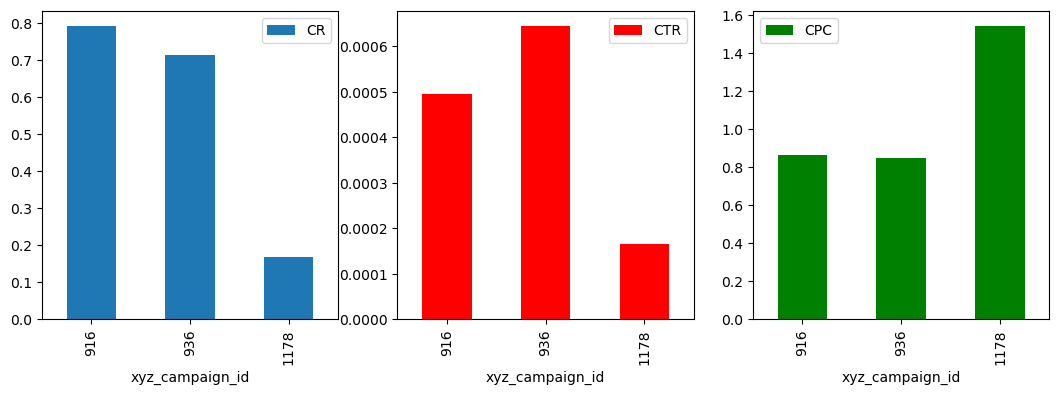

In [84]:
fig, ax= plt.subplots(1,3,figsize=(13,4))
df.groupby('xyz_campaign_id').agg({'CR':np.mean}).plot(kind='bar',ax=ax[0])
df.groupby('xyz_campaign_id').agg({'CTR':np.mean}).plot(kind='bar',ax=ax[1],color='red')
df.groupby('xyz_campaign_id').agg({'CPC':np.mean}).plot(kind='bar',ax=ax[2],color='green')


Observations:

-> The mean CR is the highest for campaign 916, Mean CTR is highest for 936 and lowest for 1178, which means ad campaign 936 is attracting more customers while campaign 916 have more total conversion per click i.e more people enquired about the product. 
        
-> Meanwhile, mean CPC is the highest for 1178. From the KPIs, campaign 1178 is not at all cost-efficient with highest CPC, while generate much lower CR and CTR than its counterparts.
        

<AxesSubplot:xlabel='gender'>

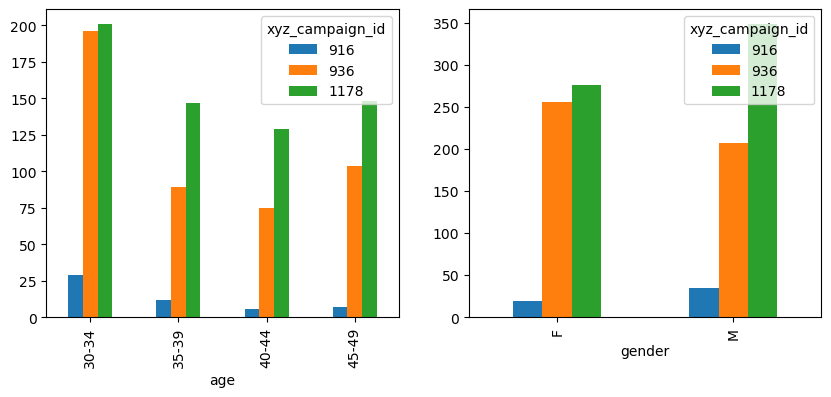

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
df[['age','xyz_campaign_id']].pivot_table(index='age',columns="xyz_campaign_id", aggfunc=len).plot(kind='bar',ax=ax[0])
df[['gender','xyz_campaign_id']].pivot_table(index='gender',columns="xyz_campaign_id", aggfunc=len).plot(kind='bar',ax=ax[1])


Observations:

1) All three campaigns primarily target the 30-34 age group. 

2) Campaign 936 has a mostly female audience, while the other two campaigns have more male audiences.

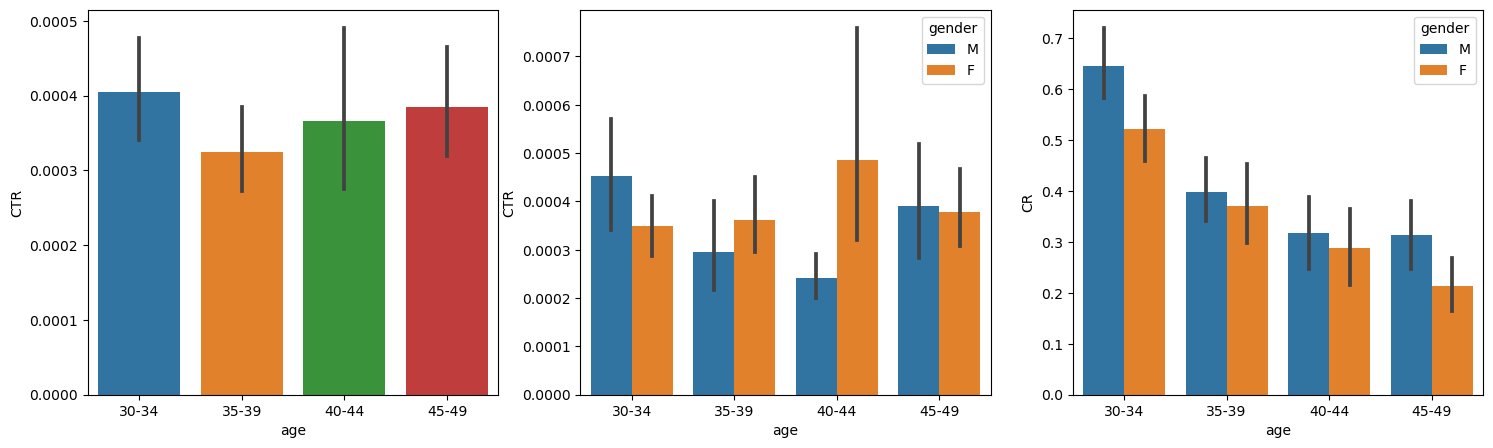

In [48]:
# plot for compairing CTR vs age and CR vs age
import seaborn as sns
fig,ax= plt.subplots(1,3,figsize=(18,5))
sns.barplot(x = df['age'], y = df['CTR'],ax=ax[0])
sns.barplot(x=df.age,y=df.CTR,hue= df.gender, ax=ax[1])
sns.barplot(x=df.age,y=df.CR, hue= df.gender, ax=ax[2])
plt.show()


Observations:
1) People in age group 30-34 have more total conversion per click (CR) than any other group.

2) People in age group 30-34 have higher Click to Impression ratio (CTR), that is they click on the ads more than any other age group and females of each age group have higher Click to Impression ratio than their male counterparts¶

3) Females in the age-group 40-44 have the highest Click to Impression ratio from all.

<AxesSubplot:xlabel='gender', ylabel='CR'>

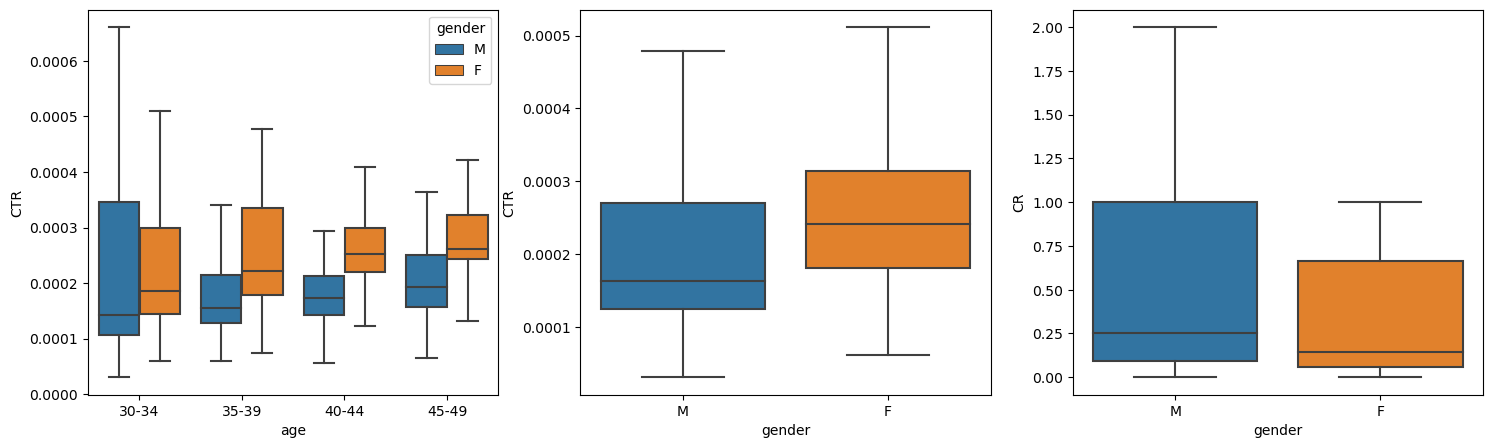

In [77]:
fig,ax =plt.subplots(1,3,figsize=(18,5))
sns.boxplot(x = df['age'], y = df['CTR'],showfliers=False, hue=df.gender,ax=ax[0])
sns.boxplot(x = df['gender'], y = df['CTR'],ax=ax[1],showfliers=False)
sns.boxplot(x = df['gender'], y = df['CR'],ax=ax[2],showfliers=False)



# Conclusion

1) With much higher performance in terms of conversion rate and click through rate found in ad campaign 916 and 936, the company should prioritize scaling them up with careful planning and consideration. Given a great budget, 1178 was able to generate large conversions and impressions. However, its efficiency is far lower than what the other two campaigns can generate with a lower budget. The company should investigate the reason for the lack of engagement and conversions of 1178,

2) The target group of people with higher click through rates are Females in age group 40-44 and 45-49.

3) The people in age group 30-34 have both high click through rates and conversion rates which means they inquire and buy more product than the others. Although females in this age group have higher CTR but they have lower CR which means they buy less compared to men.

4) Ad Campaign 916 have the highest total conversion per click while campaign 936 have highest Click through rates.